In [6]:
from kmeans import *
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# <p style="text-align: center;">K-Means and Clustering (and what it all Means)</p>

### <p style="text-align: center;">By: Joshua Majano</p>

If you ever had to do some much needed spring cleaning or needed to re-organize your closet, it can be hard to tell what are items you want to keep versus what you might need to part ways with among the mess. Only until you group items together (winter vs summer clothes, junk mail, etc.) are you able to see the underlying patterns in your belongings ("I have way too many shirts that I only wore once!"). This is the idea of *Clustering* which is a technique of grouping data points, essentially segregating groups with similar traits and assigning them into *clusters*. And clustering is part of, what is known as unsupservised learning which is of the main fields in machine learning. In unsupervised learning, the main idea is to find a pattern in our data without the prior knowledge of labels for example in supervised learning. Thus, why clustering fits under this.

In the world of data, this problem exists all over the place and that is where K-Means clustering comes in as one technique to group data points together. In this document we will explore the ideas around K-Means clustering, its implementation, and a few applications with it.

Contents:
- Basics of K-Means
- Using K-Means on grades data
- Basics of K-Means++
- Using K-Means++ on classifying cancer data
- Image Compression and K-Means++
- Using K-Means++ to compress images
- Shortcomings of K-Means
- Spectral Clustering 
- Takeaways

## Basics of K-Means

When it comes to data, what is K-Means? The main goal of K-Means is to group similar data points together to highlight possible underlying patterns in the data by trying to look for a fixed number of clusters in the dataset. This fixed number is usually known as *k*, which is where the *K* in K-Means comes from. Now what does the *Means* mean? That will come shortly.

Here, a cluster refers to the collection of points grouped together based on some similarities. For example, in the plot below, how many clusters would you consider in the plot?

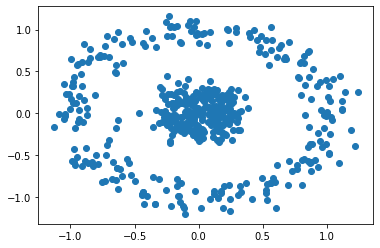

In [7]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
plt.scatter(X[:,0], X[:,1])
plt.show()

Here, we might consider two pronounced clusters: 1) the blob of points right in the center, and 2) the data points encircling that center blob. We might say that the points in the center blob have the similarity of being very near to one another whereas the data points on the outside seem to lie on a circle, give or take some noise that pushes them off from fitting a perfect circle.

Thus, here we would define our fixed number of clusters as *k=2*, and K-Means would try and group the points to belonging to one of the two clusters. How does K-Means accomplish this?

#### K-Means Algorithm

In words, the *k* clusters defined at the beginning will define the *k* centroids we will have for the dataset. Each centroid will represent the sort of center of their respective cluster. We then allocate each data point to one of the clusters that is nearest to. However, to find the centroids for each cluster, K-Means will average the points within the cluster and move the centroid of that cluster towards that average, or mean (and thus this step of finding the mean is the means for where the *Means* comes into the name *K-Means*).

And now for a version of the alogrithm that I used for this project:

1. Randomly pick *k* points from the dataset to initialize our centroids.
2. Next, measure the distance of each point in the data to each centroid. The minimum distance will represent the cluster that the point will be assigned to.
3. Once each points is assigned to a cluster, calculate the average of each cluster using all of the points assigned to the cluster. These averages will represent the new centroids for each cluster.
4. Repeat steps 2 and 3 until there is no change between centroids.

Let's have a look at a numerical example of K-Means in action.

## Using kmeans on synthetic grade data

Here we will have a look at some synthetic grade data. From the plot of the grade data points, is it evident where the clusters are? How many clusters? Well, as for the number of clusters, we make that choice and K-Means will do its best to grooup the points into the *k* clusters we specify.

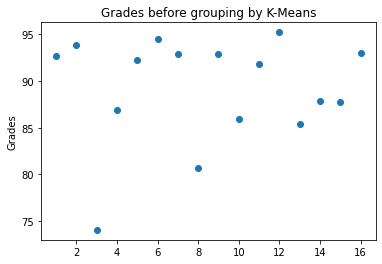

In [29]:
grades = [92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94, 80.65, 92.86,
          85.94, 91.79, 95.23, 85.37, 87.85, 87.71, 93.03]

plt.scatter(np.arange(1,len(grades)+1), grades)
plt.title('Grades before grouping by K-Means')
plt.ylabel('Grades')
plt.show()

Let's try a couple options for *k* and maybe guess where the clusters might end up, keeping in mind that the clusters are defined by points that are similar to each other. In this case, similarity will mean "distance" to one another.

1. *k=2*: The grades that are 90 and above seem close to each other so we might think that will represent one cluster and possibly the rest of the points below 90 will be the second cluster.

2. *k=3*: My guess might be the points 90 and above will be one cluster, the points between 80 and 90 will be another cluster, and the one point below 75 will be its own cluster as it seems furthest away from every other point.

Now let's see what the K-Means algorithm decides on!

##### K=2

centroids:  [[93.23222222 84.07428571]]
labels for each x:  [0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0]
vector assignments:  [[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
vector assignments:  [[74.06 86.94 80.65 85.94 85.37 87.85 87.71]]


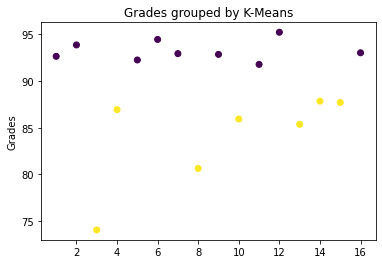

In [32]:
k = 2
grades = np.array(grades).reshape(-1,1)

centroids, labels = kmeans(grades, k)
print("centroids: ", centroids.reshape(1,-1))
print("labels for each x: ", labels)
for j in range(k):
    print("vector assignments: ", grades[labels==j].reshape(1,-1))
    
plt.scatter(np.arange(1,len(grades)+1), grades, c=labels)
plt.title('Grades grouped by K-Means')
plt.ylabel('Grades')
plt.show()

##### K=3

centroids:  [[84.07428571 94.52       92.58833333]]
labels for each x:  [2 1 0 0 2 1 2 0 2 0 2 1 0 0 0 2]
vector assignments:  [[74.06 86.94 80.65 85.94 85.37 87.85 87.71]]
vector assignments:  [[93.87 94.46 95.23]]
vector assignments:  [[92.65 92.26 92.94 92.86 91.79 93.03]]


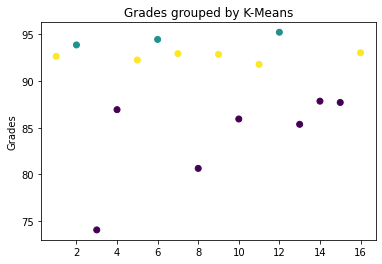

In [36]:
k = 3
centroids, labels = kmeans(grades, k)
print("centroids: ", centroids.reshape(1,-1))
print("labels for each x: ", labels)
for j in range(k):
    print("vector assignments: ", grades[labels==j].reshape(1,-1))
    
plt.scatter(np.arange(1,len(grades)+1), grades, c=labels)
plt.title('Grades grouped by K-Means')
plt.ylabel('Grades')
plt.show()

For our guess for *k=2*, we seemed spot on to what the clusters were going to be. The K-Means algorithm grouped the points 90 and above together and the rest of the points below 90 as another cluster. However, for *k=3*, it seems that the algorithm grouped the points below 90 as a cluster, the 3 highest grade data points as another cluster, and the remaining points as the last cluster. This may be a bit odd, but remember that in our algorithm, we initialize the centroids by choosing *k* random points from the data. So depending on which points were chosen, it could lead the alogrithm down a slightly different path for the centroids.

In fact, running the algorithm again produces a different set of clusters, but it won't be significantly different aside from a few points being assigned to different clusters. Besides the possible differences in clusters, K-Means still gives us a good idea at the underlying groups we might expect with this data. However, it is when we deal with more than 1 dimensional data where K-Means really helps us visualize hidden patterns within the data.

But before moving on, let's have a look at an alternate way that we can initialize our centroids.

## Basics of K-Means++

Another method to initialize our centroids when clustering is through K-Means++. Originally, our K-Means algorithm chose *k* random points from the data as the centroids. In K-Means++:

1. Pick one random point from the data as the first centroid.
2. Calculate the distance between this centroid and all other points in the data.
3. Then, choose the data point with the largest distance from this first centroid. This will be the next centroid to our group of centroids.
4. Next, for each point in the data, calculate its distance to each centroid and choose the minimum distance among them. 
5. Once the minimum distances for each point are found, find the point with the largest distance among these minimum distances. This point will be our next centroid.
6. Repeat steps 4 and 5 until we have all of our *k* centroids.

Once we have our intial *k* centroids, we continue with the same steps 3 and 4 from K-Means.

This difference in how we initialize the centroids helps in the convergence of the final centroids of the algorithm where, rather than selecting *k* random points as centroids, we are selecting one random point but then findng other points that are relatively furthest from the other points in the data to be the next centroids. So in a way, we are selecting the locations where the centroids might likely be.

## Using K-Means++ on classifying cancer data

Here we will look at cancer data and test how well can our K-Means++ classiify cancer vs. benign.

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

sc = StandardScaler()
X = sc.fit_transform(X)

In [44]:
centroids, labels = kmeans(X, k=2, centroids='kmeans++', tolerance=0.01)
confusion_matrix(y, labels)

array([[ 37, 175],
       [344,  13]])

In [45]:
tn, fp, fn, tp = confusion_matrix(y, labels).ravel()
(tn, fp, fn, tp)

(37, 175, 344, 13)

In this case, at least for my algorithm, K-Means++ did not seem to perform too well in classifying the true positives and true negatives (cancer vs benign). How about we have a look at regular K-Means as we did earlier.

In [46]:
centroids, labels = kmeans(X, k=2, centroids=None, tolerance=0.01)
confusion_matrix(y, labels)

array([[177,  35],
       [ 17, 340]])

In [47]:
tn, fp, fn, tp = confusion_matrix(y, labels).ravel()
(tn, fp, fn, tp)

(177, 35, 17, 340)

It seems that our original K-Means performed better at classifying cancer and benign. But it is still useful to see the differences between the two and also keeping in mind how our initialization of the centroids could potentially affect our results. Though, ultimately, this might come down to implementation of our K-Means++ as there are other ways of implementing K-Means++ than how I did.

## Image Compression and K-Means++

One common thing you will run into on the internet are images. Whether you are browsing your favorite or multiple social media pages, or reading an article on the newest techniques in machine learning, it is almost impossible to not run into an image. And with the large sizes that images can be in terms of space and storage, compressing images becomes important and almost necessary.

An image is comprised of pixels. For example, in a colored image, each pixel is 3 bytes containing RGB (red-blue-green) values which indicate the intensity levels of Red, Blue, Green individually.

To then compress this image, we can use K-Means++ to cluster similar colors together. Since we can choose the number of cluster *k* that we want, our choice of *k* can significantly reduce the amount of space an image would require for storage. Rather than potentially having millions of pixels, we can cluster all the colors in an image into *k* clusters and replace the RGB value of every pixel with the RGB value of their respective cluster centroid.

Let's have a look at a greyscale example.

(700, 468)


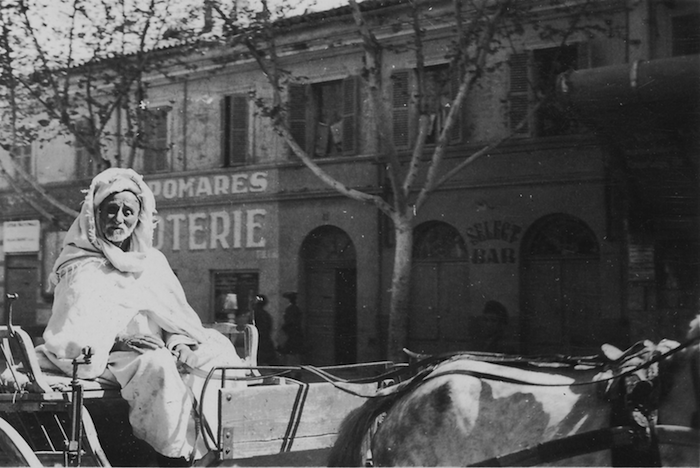

In [50]:
grey_image = Image.open('north-africa-1940s-grey.png')
print(grey_image.size)
display(grey_image)

The image size gives us an idea of how big the image is and how many pixels there are to work with. In this case, we have 700\*468 pixels in total. We will now use K-Means++ to cluster these pixels into, say, *k=4* clusters and compare the resulting image to see if the chosen clusters are representative of the original image.

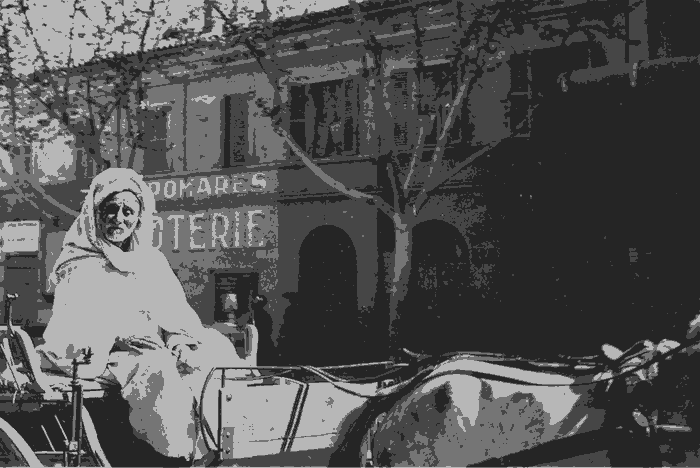

In [51]:
image_file = 'north-africa-1940s-grey.png'
pix, dim = image2pixels(image_file)  # Function to load the image and create an array of the pixels to use in K-Means

k=4
centroids, labels = kmeans(pix, k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X_pix = centroids[labels] # Reassign all points

img_ = Image.fromarray(X_pix.reshape(dim))
display(img_)

In [55]:
centroids

array([[183],
       [117],
       [ 70],
       [ 37]], dtype=uint8)

Comparing the two images, of course the compressed image is not as detailed, but we still have the essence of the image. In this case, grouping the pixels to one of 4 clusters did a great job!

Looking at the "centroids" output, we can also have a look at which grey shades were chosen as representative of the original image.

Now let's try out on a colored image. For this image, we will use a snippet of the poster image of one of the newly released films (and one of my favorite genres) Godzilla vs Kong. We will use a few different values for *k* just to see the differences and hopefully attain some good compressed images.

We will try *k=4, 16, 32*

#### Original Image

(700, 500)


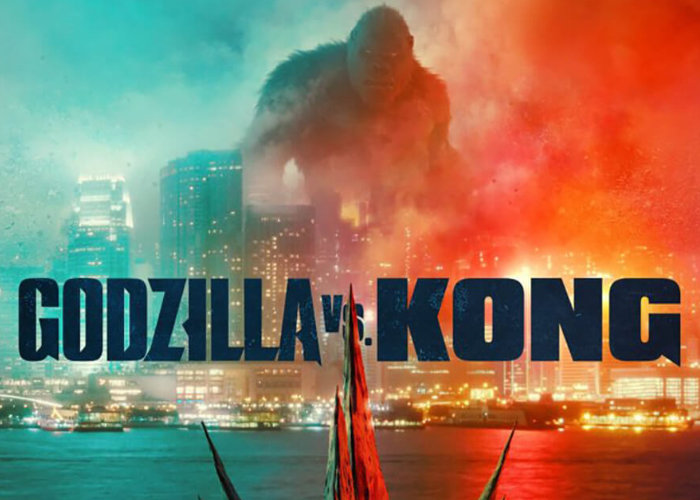

In [62]:
color_image = Image.open('Godzilla-vs-Kong-film-2021.jpeg')
print(color_image.size)
display(color_image)

#### K=4

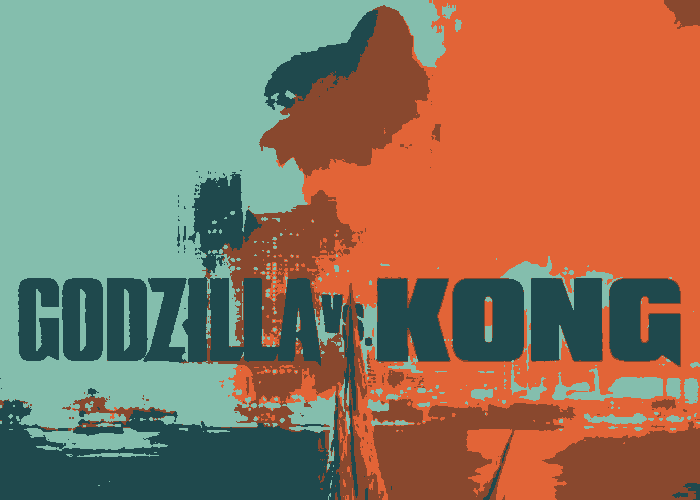

In [70]:
# Image compression with K-Means++
image_file = 'Godzilla-vs-Kong-film-2021.jpeg'
pix, dim = image2pixels(image_file)
k=4
centroids, labels = kmeans(pix, k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X_pix = centroids[labels]

img_ = Image.fromarray(X_pix.reshape(dim))
display(img_)

#### K=16

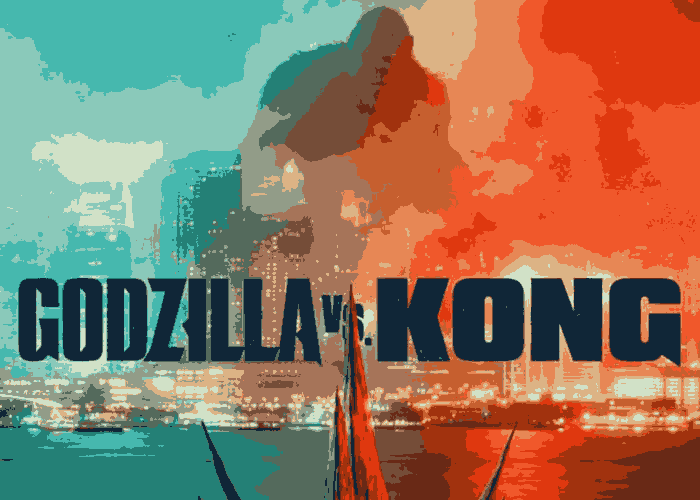

In [71]:
# Image compression with K-Means++
image_file = 'Godzilla-vs-Kong-film-2021.jpeg'
pix, dim = image2pixels(image_file)
k=16
centroids, labels = kmeans(pix, k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X_pix = centroids[labels]

img_ = Image.fromarray(X_pix.reshape(dim))
display(img_)

#### K=32

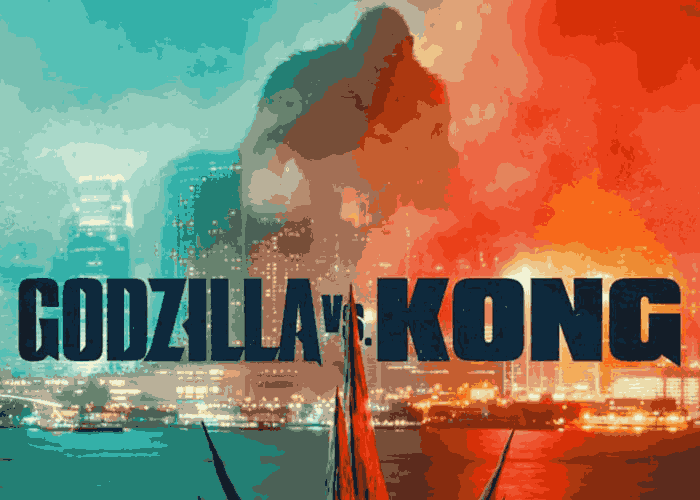

In [63]:
# Image compression with K-Means++
image_file = 'Godzilla-vs-Kong-film-2021.jpeg'
pix, dim = image2pixels(image_file)
k=32
centroids, labels = kmeans(pix, k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X_pix = centroids[labels]

img_ = Image.fromarray(X_pix.reshape(dim))
display(img_)

Certainly, the more clusters results in a clearer image, but it is still interesting to see the progression of the amount of detail of the colors we get. Four clusters was enough to get at the essence of the image (in my opinion) but even just *k*=16 clusters still gives a passable compression of the original image. The big takeaway is how we just used K-Means to compress an image which would allow us to store this image more efficiently.

## Shortcomings of K-Means

Let's return to the first image we had. As discussed, there seems to be two natural clusters in this plot: 1) the blob of points in the middle and 2) the data points that lie on a circle around the center blob of points.

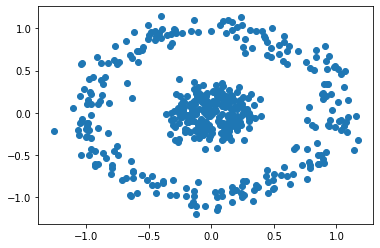

In [65]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
plt.scatter(X[:,0], X[:,1])
plt.show()

I forgot to come back to this plot, so let's have a look at how K-Means runs on this data.

[[ 0.25386298  0.06021419]
 [-0.57606477 -0.12429314]]


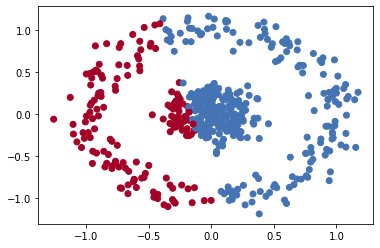

In [64]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2, centroids='kmeans++')
print(centroids)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

In all honesty, I did not forget to come back to this plot. After discussing the uses of K-Means clustering, I wanted to return to this plot as an example of where K-Means would perform poorly. 

In general, K-Means does not perform well on disjoint and nested structures like this plot. You can also describe this plot as being non-spherical. What K-Means tried to do was to find nice centroids with neat spheres around them, based on the distances from the centroids. So in this case, K-Means is not the best technique.

Take another subtle example below:

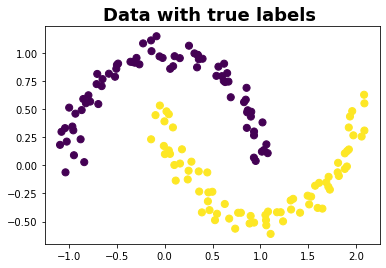

In [66]:
from sklearn.datasets import make_moons
X_mn, y_mn = make_moons(150, noise=.07, random_state=42)
cmap = 'viridis'
dot_size=50

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title('Data with true labels ', fontsize=18, fontweight='demi')

ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_size, cmap=cmap)

Let's run K-Means (both regular and k-means++) and see how it does clustering this data.

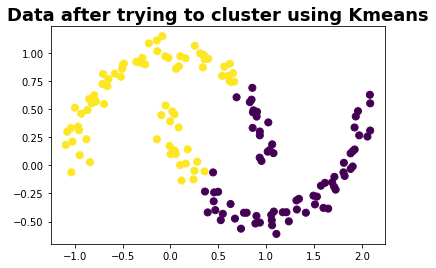

In [67]:
centroids, labels = kmeans(X_mn, k=2, centroids=None, tolerance=.01)
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title('Data after trying to cluster using Kmeans', fontsize=18, fontweight='demi')

ax.scatter(X_mn[:, 0], X_mn[:, 1],c=labels,s=dot_size, cmap=cmap)

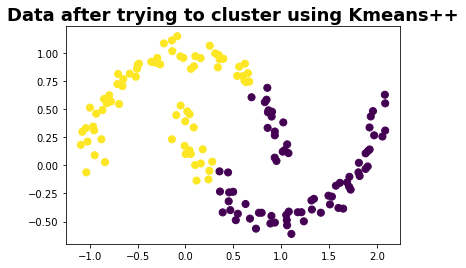

In [68]:
centroids, labels = kmeans(X_mn, k=2, centroids='kmeans++', tolerance=.01)
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title('Data after trying to cluster using Kmeans++', fontsize=18, fontweight='demi')

ax.scatter(X_mn[:, 0], X_mn[:, 1],c=labels,s=dot_size, cmap=cmap)

So, K-Means did not quite get the clustering correct, but not too far off. However, this still goes back to how K-Means tries to find the best centroids for the data. From the results, in both runs of K-Means, the algorithm seems to almost split the plot in half diagonally.

The main takeaway here is that there are types of data where K-Means will not perform well despite how intuitive the algorithm is. For this data, in particular, we will take a quick look at another clustering technique that can handle this type of data.

## Spectral Clustering

Spectral Clustering is another clustering algorithm where it treats each data point as a graph-node which then transforms the clustering problem into a graph-partitioning problem. This algorithm generally has 3 main steps:

1. Build a similarity graph/adjacency matrix between the data points. 
    - Commonly, this is done using k-nearest neighbors where each data point is connected to its, as the name suggests, k-nearest neighbors.
    - Another method is $\varepsilon$-neighborhood where each data point is connected to other data points falling inside a ball of radius $\varepsilon$ where $\varepsilon$ is a real value that has to be tuned in order to catch the local structure of data.
    
    
2. Compute the first *k* eigenvectors of its Laplacian matrix to define a feature vector for each object, or more generally, projecting the data onto a lower dimensional space.


3. Cluster the data, where commonly, we can use K-Means.

Fortunately, there is package in Sci-kit learn that can implement Spectral Clustering for us, so we can see how it will perform on this type of data.

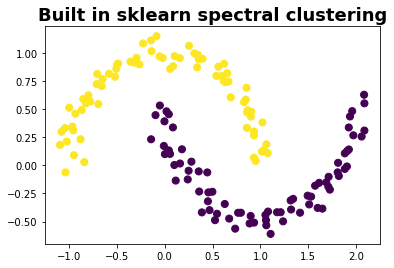

In [69]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')

labelsS = model.fit_predict(X_mn)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title('Built in sklearn spectral clustering', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsS, s=dot_size, cmap=cmap)

As we can see, spectral clustering got the clustering correct and performed better than K-Means. The alogrithm is a bit more complex than K-Means, but the real world is even more complex, so we need different techniques at our disposal to handle them.

## Takeaways

From this discussion, the main takeaway is with clustering being an important problem to solve when it comes to data in seeing possible underlying patterns, we do have techniques for solving this problem. K-Means is a common algorithm used to group data into clusters while also being fairly intuitive as to how it does the job.

While we did see with some synthetic data the ability of K-Means to effectively cluster the data, we also saw a very practical application in image compression. So if you ever need to compress an image (especially a colored one) for storage/memory purposes, K-Means can do the job for you.

However, as we also saw, K-Means is not a jack-of-all-trades when it comes to clustering certain types of data. Because of that, there are other techniques available that will perform well, like Spectral Clutering. But of course, these techniques handle more complex situations and thus, a bit less intuitive to implement by hand.